## Pendahuluan  

Pada berbagai kasus sains dan teknik, sering kali kita membutuhkan perhitungan integral:
$$
I=\int_a^b f(x)\,dx .
$$  
Akan tetapi,
1. $f$ tak selalu punya pasangan antiderivatif yang dapat diselesaikan analitik secara langsung,
2. Data $f$ mungkin hanya tersedia sebagai sampel diskret (tidak kontinu).  

**Integrasi numerik** mendekati $I$ dengan penjumlahan luas area sederhana pada sub-sub interval dikenal sebagai **integral Riemann**. Seluruh metode integrasi numerik akan berlandaskan pada integral Riemann.

## Partisi & Jumlahan Riemann (*Riemann Sum*)

Bagi $[a,b]$ menjadi titik $x_0=a<x_1<\dots<x_n=b$, dengan $\Delta x_i=x_i-x_{i-1}$.  
Pilih sampel $x_i^*\in[x_{i-1},x_i]$.  
$$
S_n=\sum_{i=1}^n f(x_i^*)\,\Delta x_i.
$$  
Jika $\Delta x_i\to0$ dan **semua** pilihan $x_i^*$ menghasilkan limit sama, maka  
$$
\lim_{\Delta x_i \to 0} S_n=\int_a^b f(x)\,dx .
$$  

Ada tiga aturan mendasar dalam pemilihan sampel sub-interval, yakni titik kiri, titik kanan, dan titik tengah

## Aturan titik kiri (*left*), titik kanan (*right*), dan titik tengah (*midpoint*) 

| Aturan        | Sampel $x_i^*$         | Formula                                               |
|---------------|--------------------------|-------------------------------------------------------|
| **Left**      | $x_{i-1}$              | $\displaystyle L_n=\sum_{i=1}^n f(x_{i-1})\,\Delta x_i$ |
| **Right**     | $x_i$                  | $\displaystyle R_n=\sum_{i=1}^n f(x_i)\,\Delta x_i$       |
| **Midpoint**  | $\frac{x_{i-1}+x_i}2$  | $\displaystyle M_n=\sum_{i=1}^n f\!\bigl(\tfrac{x_{i-1}+x_i}2\bigr)\,\Delta x_i$ |

- Lebar partisi nilainya seragam: $h=(b-a)/n$.  
- Grafik ilustrasi setiap aturan dalam bentuk batang‐batang persegi panjang sesuai titik sampel dapat dilihat pada ilustrasi di bawah ini.

<img src="../img/leftsum.png" alt="leftsum" width="400"><br />
<img src="../img/rightsum.png" alt="rightsum" width="400"><br />
<img src="../img/midpointsum.png" alt="midpointsum" width="400">

## Analisis Galat  

Gunakan ekspansi Taylor $f(x)=f(x_{i-1})+f'(x_{i-1})(x-x_{i-1})+O((x-x_{i-1})^2)$.  
- **Left & Right**: galat tiap interval $O(h^2)$ ⇒ galat total $O(nh^2)=O(h)$.  
- **Midpoint**: simetri menghilangkan orde $O(h)$, menghasilkan galat total $O(h^2)$, lebih akurat pada $n$ yang sama .


## Implementasi & Ilustrasi dengan Python  

Contoh fungsi  
$$
f(x)=\sin x,\quad a=0,\;b=\pi,\quad I_{\rm eksak}=2.
$$  
Kode di bawah menghitung dan membandingkan $L_n,R_n,M_n$ untuk $n=4,8,16$, serta mengilustrasikan masing-masing aturan untuk nilai yang lain, misal $n=5$.  

- **Tabel** menunjukkan konvergensi $L_n$ dan $R_n$ dengan galat $O(h)$, serta $M_n$ dengan galat $O(h^2)$.  
- **Grafik** menampilkan bagaimana batang‐batang persegi panjang dibentuk menurut setiap aturan.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi contoh dan interval
def f(x):
    return np.sin(x)

a, b = 0.0, np.pi
exact = 2.0  # ∫₀ᵖⁱ sin(x) dx = 2

# Implementasi left, right, midpoint
def left_riemann(f, a, b, n):
    xs = np.linspace(a, b, n+1)
    h = (b - a) / n
    return h * np.sum(f(xs[:-1]))

def right_riemann(f, a, b, n):
    xs = np.linspace(a, b, n+1)
    h = (b - a) / n
    return h * np.sum(f(xs[1:]))

def midpoint_rule(f, a, b, n):
    h = (b - a) / n
    mids = a + (np.arange(n) + 0.5) * h
    return h * np.sum(f(mids))

# Hitung untuk n = 4, 8, 16
results = []
for n in [4, 8, 16]:
    L = left_riemann(f, a, b, n)
    R = right_riemann(f, a, b, n)
    M = midpoint_rule(f, a, b, n)
    results.append({
        'n': n,
        'Left Sum': L,
        'Right Sum': R,
        'Midpoint': M,
        'Error (Left)': L - exact,
        'Error (Right)': R - exact,
        'Error (Midpoint)': M - exact,
    })

df = pd.DataFrame(results)
print(df.to_markdown(index=False))


|   n |   Left Sum |   Right Sum |   Midpoint |   Error (Left) |   Error (Right) |   Error (Midpoint) |
|----:|-----------:|------------:|-----------:|---------------:|----------------:|-------------------:|
|   4 |    1.89612 |     1.89612 |    2.05234 |    -0.103881   |     -0.103881   |         0.0523443  |
|   8 |    1.97423 |     1.97423 |    2.01291 |    -0.0257684  |     -0.0257684  |         0.0129091  |
|  16 |    1.99357 |     1.99357 |    2.00322 |    -0.00642966 |     -0.00642966 |         0.00321638 |


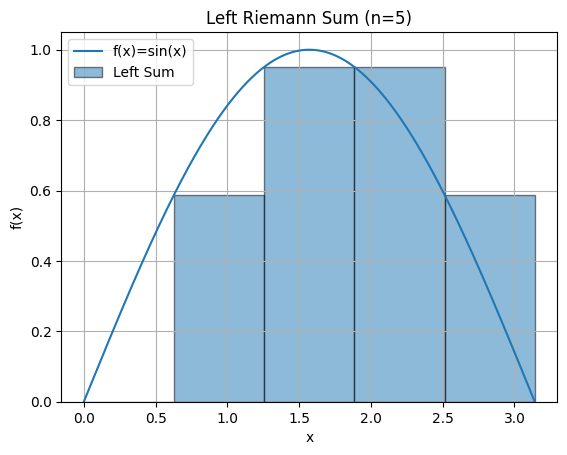

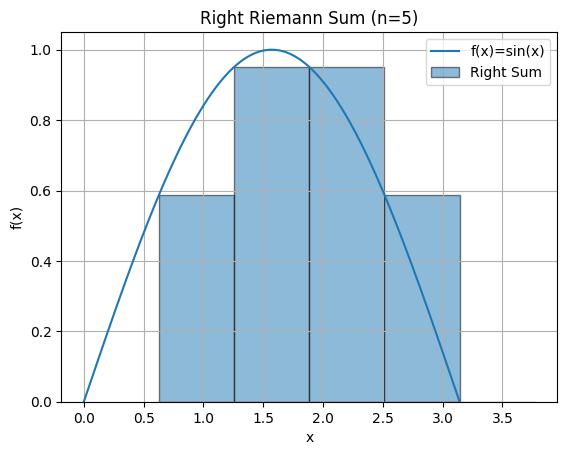

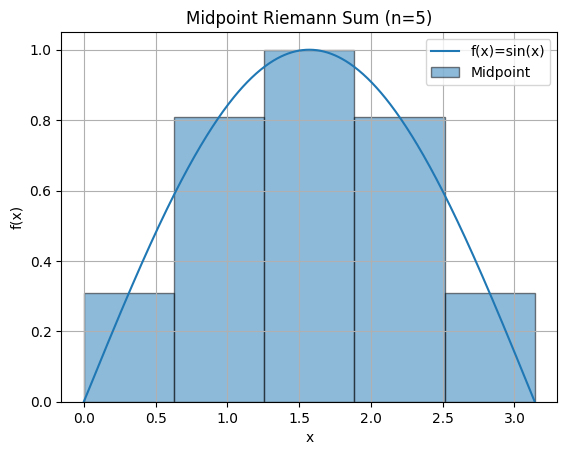

In [9]:
# Ilustrasi (n = 5)
n_demo = 5
xs = np.linspace(a, b, n_demo+1)
h = (b - a) / n_demo
x_plot = np.linspace(a, b, 500)

# Left Riemann
plt.figure()
plt.plot(x_plot, f(x_plot), 'C0', label='f(x)=sin(x)')
plt.bar(xs[:-1], f(xs[:-1]), width=h, align='edge',
        edgecolor='black', alpha=0.5, label='Left Sum')
plt.title('Left Riemann Sum (n=5)')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.legend(); plt.grid(True)
plt.show()

# Right Riemann
plt.figure()
plt.plot(x_plot, f(x_plot), 'C0', label='f(x)=sin(x)')
plt.bar(xs[1:], f(xs[1:]), width=h, align='edge',
        edgecolor='black', alpha=0.5, label='Right Sum')
plt.title('Right Riemann Sum (n=5)')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.legend(); plt.grid(True)
plt.show()

# Midpoint Riemann
mids = xs[:-1] + 0.5*h
plt.figure()
plt.plot(x_plot, f(x_plot), 'C0', label='f(x)=sin(x)')
plt.bar(mids, f(mids), width=h, align='center',
        edgecolor='black', alpha=0.5, label='Midpoint')
plt.title('Midpoint Riemann Sum (n=5)')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.legend(); plt.grid(True)
plt.show()
